In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Loading the dataset using pandas
data = pd.read_csv('California_Houses.csv')

### The following are the what the features in the dataset mean,
1) <u>**Median House Value:**</u> Median house value for households within a block (measured in US Dollars) [$]
2) <u>**Median Income:**</u> Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]
3) <u>**Median Age:**</u> Median age of a house within a block; a lower number is a newer building [years]
4) <u>**Total Rooms:**</u> Total number of rooms within a block
5) <u>**Total Bedrooms:**</u> Total number of bedrooms within a block
6) <u>**Population:**</u> Total number of people residing within a block
7) <u>**Households:**</u> Total number of households, a group of people residing within a home unit, for a block
8) <u>**Latitude:**</u> A measure of how far north a house is; a higher value is farther north [°]
9) <u>**Longitude:**</u> A measure of how far west a house is; a higher value is farther west [°]
10) <u>**Distance to coast:**</u> Distance to the nearest coast point [m]
11) <u>**Distance to Los Angeles:**</u> Distance to the centre of Los Angeles [m]
12) <u>**Distance to San Diego:**</u> Distance to the centre of San Diego [m]
13) <u>**Distance to San Jose:**</u> Distance to the centre of San Jose [m]
14) <u>**Distance to San Francisco:**</u> Distance to the centre of San Francisco [m]

In [ ]:
# Looking the first 5 rows of the dataset
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
# Checking the number of rows and columns in the dataset
data.shape

(20640, 14)

In [5]:
# Getting the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [10]:
# Descriptive statistics of the dataset
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [8]:
# Checking the number of missing values in each column
data.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [6]:
# Histogram to visualize the distribution of house prices in California
fig = px.histogram(data, 
                   x = 'Median_House_Value',
                   nbins = 50,
                   title = 'Distribution of House Prices in California',
                   labels = {'Median_House_Value':'Median House Price (In USD)'}
                   )
fig.update_layout(bargap=0.1)
fig.update_layout(width=1000, height=600)
#fig.write_image('histogram_house_prices.png')
#fig.show(renderer='png')
fig.show()

In [25]:
# Histogram to visualize the distribution of house ages in California
fig = px.histogram(data,
                   x = 'Median_Age',
                   title = 'Distribution of House Age in California',
                   color_discrete_sequence = ['indianred'],
                   labels = {'Median_Age':'Median House Age (In Years)'}
                    )
fig.update_layout(bargap = 0.1, width = 1000, height = 600)
fig.show()

In [32]:
# Corralation matrix to see the correlation between different features
data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248


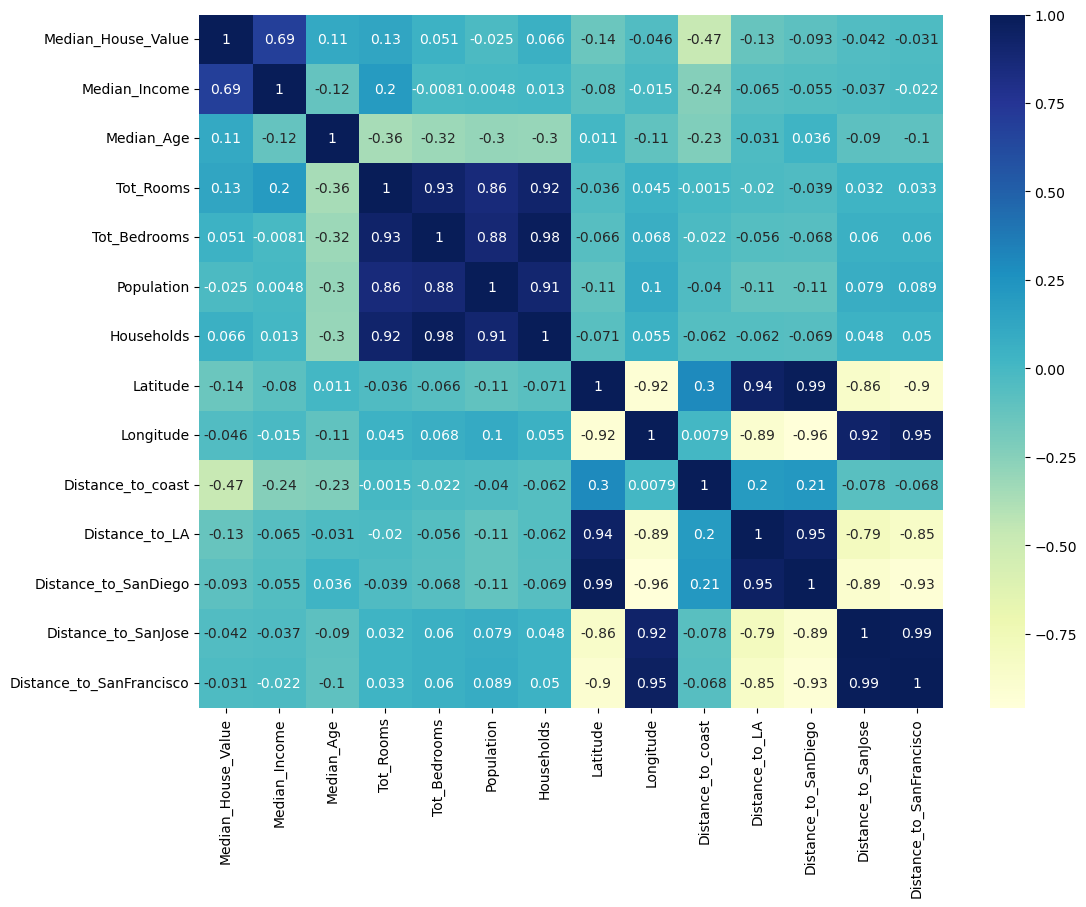

In [49]:
# Corralation matrix heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),
            annot = True,
            cmap = 'YlGnBu'
            )
plt.show()

### From the correlation matrix of the dataset, I can see that there exists multi colinearity betweem many feature and they are as follows,
- Tot_Rooms
- Tot_Bedrooms
- Population
- Households
- Latitude
- Longitude
- Distance_to_LA
- Distance_to_SanDiego
- Distance_to_SanJose
- Distance_to_SanFrancisco

### So, I will be only using the following features to train the model because the following features has the highest correlation with the 'Price' feature
- median income
- median age
- tot rooms
- distance to coast
- distance to la

In [51]:
# Create a new feature named 'Rooms_per_Household' by dividing 'Tot_Rooms' by 'Households'
data['Rooms_per_Household'] = data['Tot_Rooms'] / data['Households']

In [53]:
data.sample()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household
11962,87800.0,2.7083,25,1858,366,1311,331,34.01,-117.4,63550.242329,77887.711916,145615.777945,548915.492342,616726.008546,5.613293


In [54]:
# Computing the correlation matrix again to see the correlation of the new feature with other features
data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559,0.151948
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424,0.326895
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447,-0.153277
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920,0.133798
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250,0.000787
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618,-0.072213
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157,-0.080598
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397,0.106389
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864,-0.027540
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248,0.185594


In [58]:
# Computing the correlation between 'bedroom_to_room_ratio' and 'Median_House_Value' for testing 
(data['Tot_Bedrooms']/data['Tot_Rooms']).corr(data['Median_House_Value'])

-0.2556241671955806

In [59]:
# Creating the new feature 'Bedroom_to_Room_Ratio' by dividing 'Tot_Bedrooms' by 'Tot_Rooms'
data['Bedroom_to_Room_Ratio'] = data['Tot_Bedrooms'] / data['Tot_Rooms']

In [61]:
# Computing the correlation matrix again to see the correlation of the new feature with other features
data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Rooms_per_Household,Bedroom_to_Room_Ratio
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559,0.151948,-0.255624
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424,0.326895,-0.615479
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447,-0.153277,0.136367
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920,0.133798,-0.187361
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250,0.000787,0.086110
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618,-0.072213,0.037075
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157,-0.080598,0.067022
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397,0.106389,-0.114302
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864,-0.027540,0.092868
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248,0.185594,-0.077337


#### I've create the following new features:

- Rooms_per_Household
- Bedrooms_to_Room_Ratio

##### these new features have better correlation with 'Price' feature and doesn't have multi colinearity with other features. SO, I'll be adding these new features to final training data.

#### The final features are as follows,
1. Median_House_Value
2. Median_Income
3. Median_Age
4. Rooms_per_Household
5. Bedroom_to_Room_Ratio
6. Distance_to_coast
7. Distance_to_LA

In [65]:
# Final dataset with selected features
final_data = data[['Median_House_Value', 'Median_Income', 'Median_Age', 'Rooms_per_Household', 'Bedroom_to_Room_Ratio', 'Distance_to_coast', 'Distance_to_LA']]
final_data

,Median_House_Value,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
0,452600.0,8.3252,41,6.984127,0.146591,9263.040773,556529.158342
1,358500.0,8.3014,21,6.238137,0.155797,10225.733072,554279.850069
2,352100.0,7.2574,52,8.288136,0.129516,8259.085109,554610.717069
3,341300.0,5.6431,52,5.817352,0.184458,7768.086571,555194.266086
4,342200.0,3.8462,52,6.281853,0.172096,7768.086571,555194.266086
...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,5.045455,0.224625,162031.481121,654530.186299
20636,77100.0,2.5568,18,6.114035,0.215208,160445.433537,659747.068444
20637,92300.0,1.7000,17,5.205543,0.215173,153754.341182,654042.214020
20638,84700.0,1.8672,18,5.329513,0.219892,152005.022239,657698.007703


In [67]:
# Computing the correlation matrix of our final dataset
final_data.corr()

,Median_House_Value,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
Median_House_Value,1.000000,0.688075,0.105623,0.151948,-0.255624,-0.469350,-0.130678
Median_Income,0.688075,1.000000,-0.119034,0.326895,-0.615479,-0.243443,-0.065421
Median_Age,0.105623,-0.119034,1.000000,-0.153277,0.136367,-0.226621,-0.031435
Rooms_per_Household,0.151948,0.326895,-0.153277,1.000000,-0.418704,0.185594,0.110041
Bedroom_to_Room_Ratio,-0.255624,-0.615479,0.136367,-0.418704,1.000000,-0.077337,-0.133605
Distance_to_coast,-0.469350,-0.243443,-0.226621,0.185594,-0.077337,1.000000,0.197672
Distance_to_LA,-0.130678,-0.065421,-0.031435,0.110041,-0.133605,0.197672,1.000000


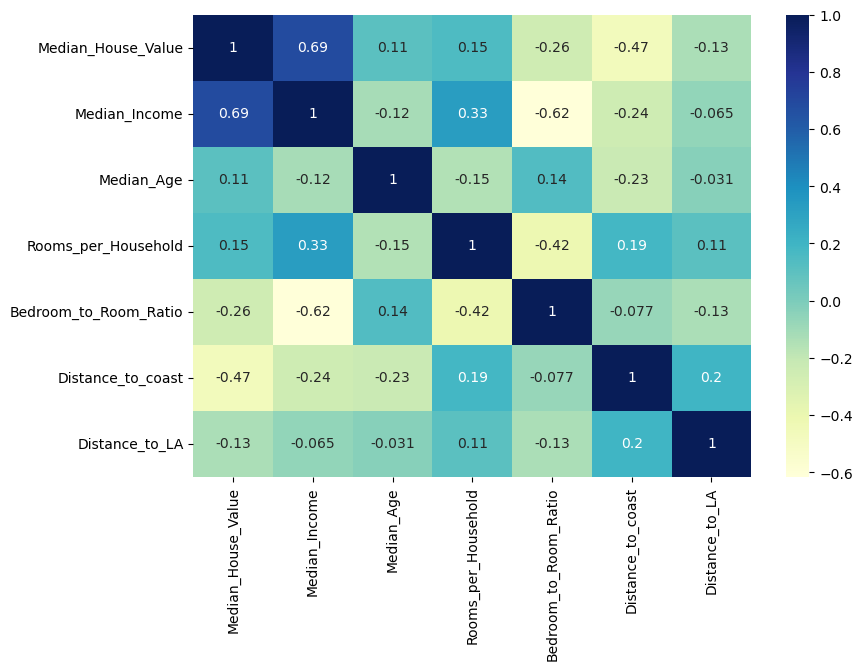

In [85]:
# Corralation matrix heatmap of our final dataset
plt.figure(figsize=(9,6))
sns.heatmap(final_data.corr(),
            annot = True,
            cmap = 'YlGnBu'
            )
plt.show()   

In [86]:
# Importing the required Scikit-Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [87]:
# Splitting the data into features and target variable
X_data = final_data.drop('Median_House_Value', axis=1)
Y_data = final_data['Median_House_Value']

In [97]:
# Shapes of X_data and Y_data
print(f'X_data --> {X_data.shape}')
print(f'Y_data --> {Y_data.shape}')

X_data --> (20640, 6)
Y_data --> (20640,)


In [90]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [103]:
# Shapes of the training and testing sets
print(f'x_train --> {x_train.shape}')
print(f'y_train --> {y_train.shape}')
print(f'x_test --> {x_test.shape}')
print(f'y_test --> {y_test.shape}')

x_train --> (16512, 6)
y_train --> (16512,)
x_test --> (4128, 6)
y_test --> (4128,)


In [104]:
x_train.sample()

,Median_Income,Median_Age,Rooms_per_Household,Bedroom_to_Room_Ratio,Distance_to_coast,Distance_to_LA
17414,4.3162,26,5.693878,0.168785,13852.390132,217502.996605


- here, the features have very wide range of values. 
Let's Standadize them:

In [107]:
# Initializing the StandardScaler object
standard_scaler = StandardScaler()
standard_scaler

StandardScaler()

In [108]:
# Standardizing the feature variables
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [112]:
x_train[0:5]

array([[-0.326196  ,  0.34849025, -0.17491646, -0.2117846 , -0.57891577,
        -0.33717322],
       [-0.03584338,  1.61811813, -0.40283542,  0.34218528, -0.78250613,
        -0.96083341],
       [ 0.14470145, -1.95271028,  0.08821601, -0.66165785, -0.55154934,
        -0.21982973],
       [-1.01786438,  0.58654547, -0.60001532,  0.78303162, -0.71997526,
        -0.3474564 ],
       [-0.17148831,  1.14200767,  0.3490073 , -0.55036364,  2.78424422,
         0.25737816]])

In [113]:
# Initializing the LinearRegression model
linear_model = LinearRegression()
linear_model

LinearRegression()

In [114]:
# Fitting the model on the training data
linear_model.fit(x_train, y_train)

LinearRegression()

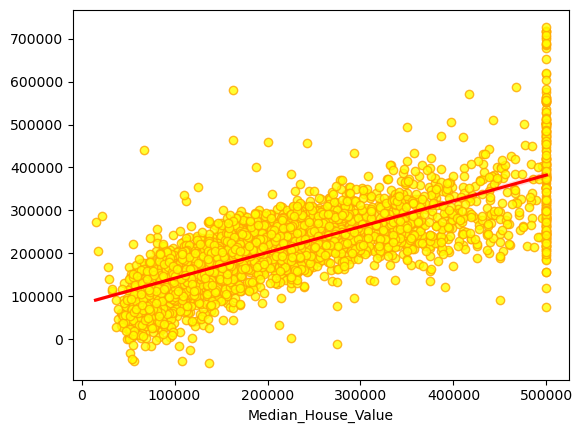

In [ ]:
# Visualizing the model's predictions
sns.regplot(x = y_test,
                y = linear_model.predict(x_test),
                scatter_kws = {'color': 'yellow', 'edgecolor': 'orange'},
                line_kws = {'color': 'red'}
                )
plt.show()